In [17]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import datetime
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import load
from sklearn.preprocessing import StandardScaler
import os
import zipfile
from tkinter import messagebox
from tkinter import filedialog
from tkinter import *

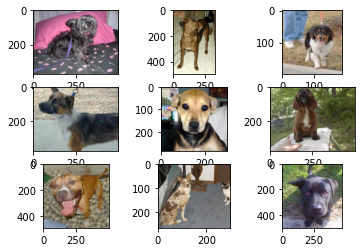

In [2]:
#extraction and preprocessing instruction from machine learning mastery

# plot dog photos from the dogs vs cats dataset

# define location of dataset
folder = 'catdogtrain/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

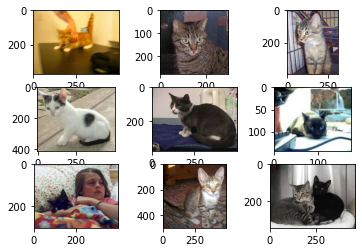

In [3]:

# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'catdogtrain/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [54]:
# define location of dataset
folder = 'catdogtrain/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('dog'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(150, 150))
	# convert to numpy array
	photo = img_to_array(photo)
	photo = photo/255
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
np.save('dogs_vs_cats_photos.npy', photos)
np.save('dogs_vs_cats_labels.npy', labels)

(25000, 150, 150, 3) (25000,)


In [55]:
# define location of dataset
folder = 'catdogtest/test/'
test_photos = list()
#emerate files in the directory
for file in listdir(folder):
	# load image
	test_photo = load_img(folder + file, target_size=(150, 150))
	# convert to numpy array
	test_photo = img_to_array(test_photo)
	test_photo = test_photo/255
	# store
	test_photos.append(test_photo)
# convert to a numpy arrays
test_photos = np.asarray(test_photos)
print(test_photos.shape)
# save the reshaped photos
np.save('test_dogs_vs_cats_photos.npy', test_photos)

(12500, 150, 150, 3)


In [56]:
type(test_photos)

numpy.ndarray

In [57]:
x_train, x_val, y_train, y_val = train_test_split(photos, labels, test_size = 0.2, random_state = 42)


In [58]:
EPOCH = 5
BSIZE = 20
TSIZE = len(x_train)
VSIZE = len(x_val)

In [21]:
pred_1 = model.predict_classes(test_photos)

pred_1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [41]:
prediction_1 = np.hstack(pred_1)
prediction_1

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
df_sub_1 = pd.DataFrame({'label': prediction_1})
df_sub_1.head()


,label
0,1
1,1
2,1
3,1
4,1


In [44]:
id = np.array(range(1, 12501))

df_sub_1['id'] = id

df_sub_1 = df_sub_1[['id', 'label']]

df_sub_1.tail()

,id,label
12495,12496,1
12496,12497,1
12497,12498,1
12498,12499,1
12499,12500,1


In [45]:
df_sub_1.to_csv('Module_7_Submission_1.csv', index = False)

In [19]:

df_sub_2['id'] = id

df_sub_2 = df_sub_2[['id', 'label']]

df_sub_2.tail()
df_sub_2['label'].value_counts()

0    12500
Name: label, dtype: int64

In [66]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [67]:
#VERY IMPORTANT, The path needs to be to a folder, that contains folders, that contains the images, 
#NOT the folder with the images itself

train_generator = train_datagen.flow_from_directory('catdogtrain', batch_size = 20, 
                                                    class_mode = 'binary', target_size = (150, 150))

Found 25000 images belonging to 1 classes.


In [23]:
train_generator


In [68]:
test_generator = test_datagen.flow_from_directory('catdogtest', batch_size = 20, 
                                                    class_mode = 'binary', target_size = (150, 150))

Found 12500 images belonging to 1 classes.


In [80]:
#build  cnn

callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 1)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [81]:
opt = keras.optimizers.RMSprop(learning_rate = 0.001)

In [82]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [83]:
#fit the data to the created model & time it

start=datetime.datetime.now()
m4 = model.fit(train_generator, epochs = 3, callbacks = [callback])
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)


#One epoch produced an accuracy rate of 0.9998, which is likely screaming 'overfit', will reduce a bit
#with dropout and try again

#Eventhough a dropout was used, still a 0.9999 was produced, but again, only 0's were produced for 
#the test predict. I'm not sure what's going on.

#Tried it again, and still the same - all predicted as cats, am trying a smaller model to go faster
#below, with 2 dense layers, read online that sometimes that helps? JK can't, has to have 1

Epoch 1/3
1250/1250 [==============================] - 962s 770ms/step - loss: 5.4719e-04 - binary_accuracy: 1.0000
Epoch 2/3
1250/1250 [==============================] - 966s 773ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Epoch 3/3
1250/1250 [==============================] - 965s 772ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Total Time Elapsed: 0:48:17.110808


In [ ]:
pred_4 = model.predict(test_generator)

pred_4

In [ ]:
start=datetime.datetime.now()
m5 = model.fit(train_generator, steps_per_epoch = 100, epochs = 3, callbacks = [callback], verbose = 2)
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)

In [59]:
#build  cnn


model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [60]:
opt = keras.optimizers.RMSprop(learning_rate = 0.01)

In [61]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [64]:
start=datetime.datetime.now()
m3 = model.fit(x_train, y_train, epochs = 1, validation_data = (x_val, y_val))
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)



625/625 [==============================] - 311s 497ms/step - loss: 0.6935 - binary_accuracy: 0.4977 - val_loss: 0.6936 - val_binary_accuracy: 0.4970
Total Time Elapsed: 0:05:11.418450


In [65]:
pred_3 = model.predict(test_photos)

pred_3

array([[0.5129881],
       [0.5129881],
       [0.5129881],
       ...,
       [0.5129881],
       [0.5129881],
       [0.5129881]], dtype=float32)

In [48]:
prediction_3 = np.hstack(pred_3)
prediction_3

df_sub_3 = pd.DataFrame({'label': prediction_3})
df_sub_3.head()


,label
0,1
1,1
2,1
3,1
4,1


In [49]:
df_sub_3['id'] = id

df_sub_3 = df_sub_3[['id', 'label']]

df_sub_3.tail()
df_sub_3['label'].value_counts()

1    12500
Name: label, dtype: int64

In [ ]:
df_sub_3.to_csv('Module_7_Submission_2.csv', index = False)

In [ ]:
#local_zip = '/Downloads/catdogtrain.zip'

#zip_ref = zipfile.ZipFile(local_zip, 'r')

#zip_ref.extractall('/Downloads')
#zip_ref.close()